In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from pathlib import Path
from PIL import Image # use the python image library
from collections import defaultdict
import numpy as np

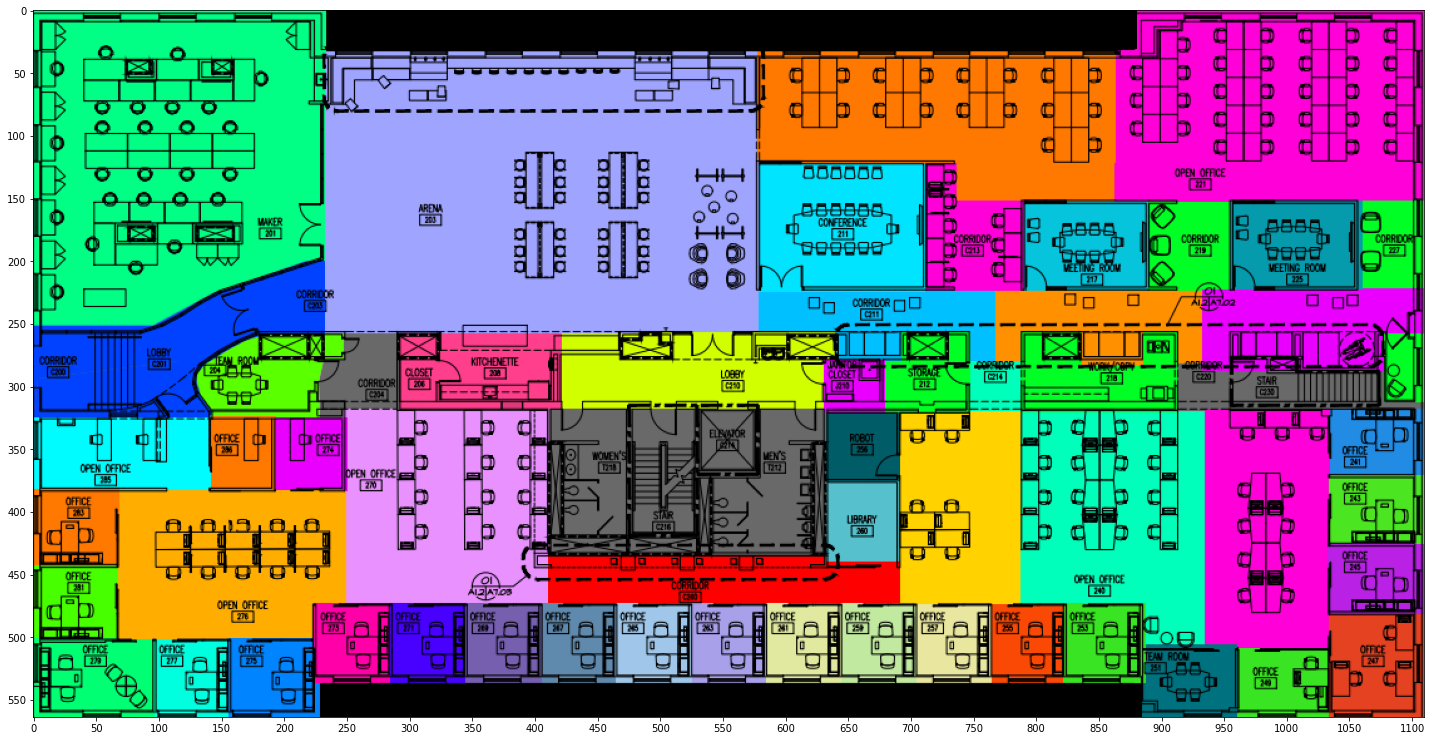

In [2]:
filepath = Path("building_plan/floorplan_geometry.png")
img = Image.open(filepath)

plt.figure(figsize = (26,13))
plt.xticks(range(0,1110,50))
plt.yticks(range(0,564,50))

plt.imshow(img)
plt.show()

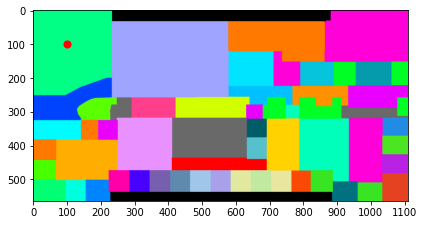

Get RGB at point 100 x 100 px
(0, 255, 132)


In [5]:
""" Using matplotlib and want to show the image in your interactive notebook
"""
filepath = Path("building_plan/room_color.png")
img = Image.open(filepath)


plt.xticks(range(0,1110,100))
plt.yticks(range(0,564,100))


points=[(100,100)]

x = list(map(lambda x: x[0], points))
y = list(map(lambda x: x[1], points))

plt.scatter(x, y, color = 'red', s=50)
plt.imshow(img)

plt.tight_layout()
plt.show()

print(f'Get RGB at point {x[0]} x {y[0]} px')

res_RGB = list(img.getpixel((50, 50)))
res_RGB.pop()
print(tuple(res_RGB))

In [6]:
""" Define a 2-D Matrix to display pixel value (RGB) from image 
"""
filepath = Path("building_plan/room_color.png")
img = Image.open(filepath)
img = img.convert('RGB')

width, height = img.size
# print(width, height)

pixel_matrix = np.empty([width, height], dtype=object)

for i in range(width):
    for j in range(height):
        pixel_matrix[i][j] = img.getpixel((i,j)) # im.getpixel: return a pixel value at point (i,j)

print(f"The pixel size of the image:")
print(pixel_matrix.shape)

The pixel size of the image:
(1110, 564)


![](https://i.imgur.com/x06loGg.png)
![](https://i.imgur.com/FYD4GyN.png)

In [7]:
def find_blocks(matrix,pixel_defaultdict):
    visited = []
    block_list = []     
    cnt = 0
    for x in range(len(matrix)):
        for y in range(len(matrix[0])):
            if (x, y) not in visited:
                field_count, visited, cnt, pixel_defaultdict = explore_block(matrix, x, y, visited, cnt, pixel_defaultdict)
                if field_count > 300:
                    block_list.append(field_count) 
                    cnt += 1
                    print(f"Number of Explored Block: {field_count}")
                else:
                    block_list[-1] = block_list[-1]+field_count
                
    return print('biggest block: {0}, number of blocks: {1}, block_list: {2}'
                 .format(max(block_list), len(block_list), block_list ))


def explore_block(matrix, x, y, visited, cnt, pixel_defaultdict):
    queue = {(x,y)}
    field_count = 1
    while queue: 
        x,y = queue.pop()
        pixel_defaultdict[x,y] = cnt
        visited.append((x,y))
        
        if x+1<len(matrix) and (x+1,y) not in visited and (x+1,y) not in queue:
            if matrix[x+1][y] == matrix[x][y]:
                field_count += 1
                queue.add((x+1,y))  
        if x-1>=0 and (x-1,y) not in visited and (x-1,y) not in queue:
            if matrix[x-1][y] == matrix[x][y]:
                field_count += 1
                queue.add((x-1,y)) 
        if y-1>=0 and (x,y-1) not in visited and (x,y-1) not in queue:
            if matrix[x][y-1] == matrix[x][y]:
                field_count += 1
                queue.add((x,y-1)) 
        if y+1<len(matrix[0]) and (x,y+1) not in visited and (x,y+1) not in queue:
            if matrix[x][y+1] == matrix[x][y]:
                field_count += 1
                queue.add((x,y+1)) 
        
    return field_count, visited, cnt, pixel_defaultdict 

In [ ]:
""" check the execution time of Python script 
"""
import time
start = time.time()

pixel_defaultdict = defaultdict(int)
find_blocks(pixel_matrix,pixel_defaultdict)

end = time.time()

print(f"The time of execution of above program is : {round(end-start,2)} sec")

In [ ]:
df = pd.DataFrame.from_dict(pixel_defaultdict, orient="index")
df.to_csv("output_geoid.csv")

In [9]:
""" calculate the centroid of a set of coordinate tuples in python
https://stackoverflow.com/questions/23020659/fastest-way-to-calculate-the-centroid-of-a-set-of-coordinate-tuples-in-python-wi
"""

df = pd.read_csv("linklab_geoid.csv", index_col = 0)
d = df.to_dict("split")

gg = d["index"]
for i in range(len(gg)):
    d["index"][i] = eval(gg[i])
    

geoid_defaultdict = dict(zip(d["index"], d["data"]))

value = 0
space = []
res_coordinate = []


for k in geoid_defaultdict.keys():
    if geoid_defaultdict[k] == [value]:
        space.append(k)
   
    if geoid_defaultdict[k] != [value]:
        value+=1
        space = tuple(space)
        center = tuple(np.mean(space, axis=0))
        
        res_coordinate.append(center)
        space = []
print(value)
print(res_coordinate)

59
[(110.75861305791221, 116.52648469199558), (107.38087649402391, 270.3594289508632), (70.79096805776527, 353.24452331415984), (34.01615585649798, 412.0144927536232), (33.50849606898301, 471.50722799898557), (47.845749054431835, 532.1529353724717), (154.95320267686424, 439.0998087954111), (125.36187399030695, 528.4827679052235), (187.43448506092471, 291.039893173093), (166.15665374677002, 351.02551679586566), (190.18535930154465, 529.5509290351466), (219.9884991374353, 349.6155836687752), (253.10804020100502, 499.15276381909547), (261.81584215041465, 291.01458392908205), (555.9263371470439, 549.5753254804712), (405.25838991020703, 144.8968218182755), (555.7791806958473, 16.548260381593714), (330.5281895552803, 394.9711111999041), (314.5076842927846, 504.50820526178694), (356.50827029106296, 287.5037825362226), (375.0076863950807, 504.50807071483473), (435.0076821192053, 504.5083443708609), (548.4354330708661, 454.38503937007874), (521.9790188331863, 376.51547696674464), (528.612768910

No handles with labels found to put in legend.


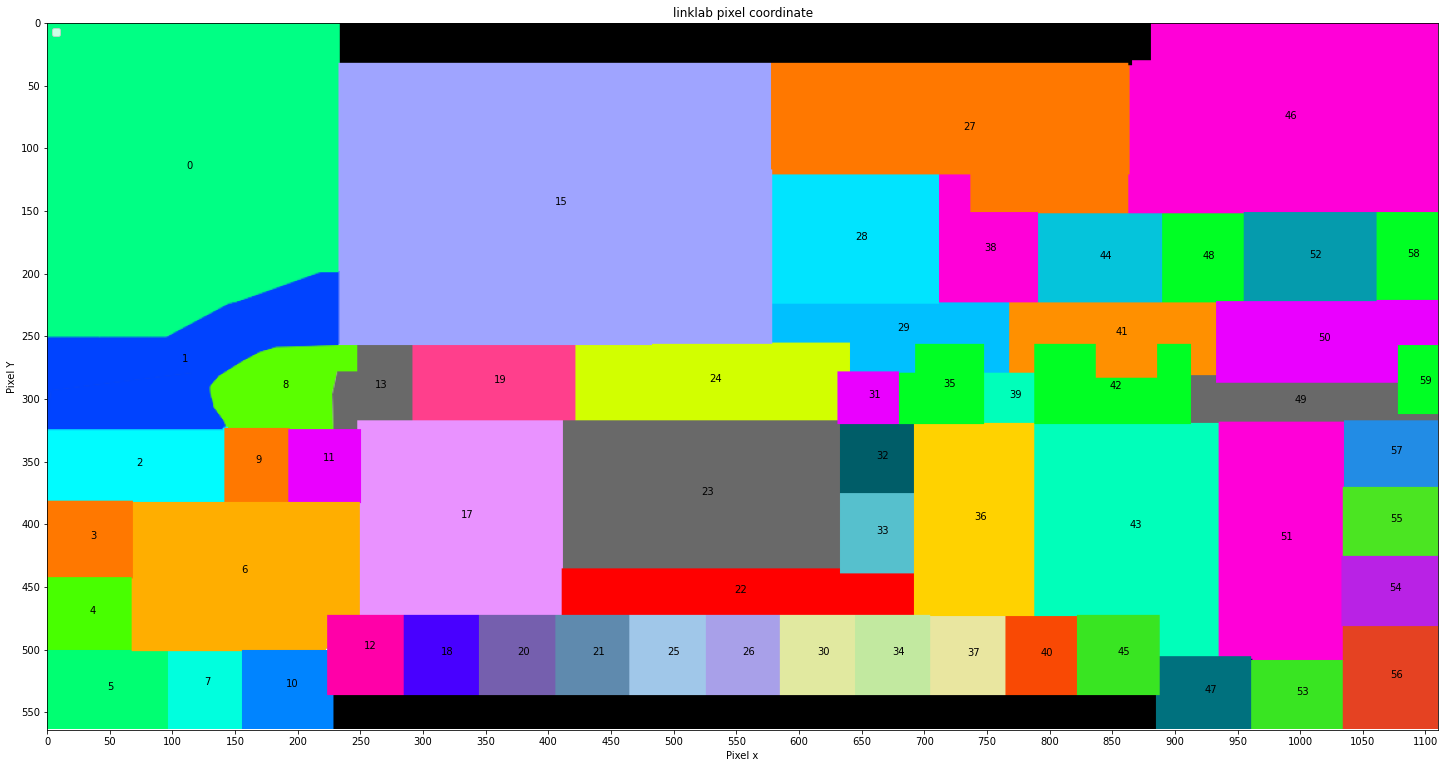

In [10]:
filepath = Path("building_plan/room_color.png")
img = Image.open(filepath)

plt.figure(figsize = (26,13))
plt.xticks(range(0,1110,50))
plt.yticks(range(0,564,50))

d = [i for i in range(60)]

# Awair-Onmi: to draw a point on co-ordinate (200,300)
points = res_coordinate
points.append((1095,288))
x = list(map(lambda x: x[0], points))
y = list(map(lambda x: x[1], points))
# plt.scatter(x, y, color = 'red', s=200)

for xy in zip(x, y):
    plt.annotate('', xy=xy, color='red', fontsize=20)

for i, txt in enumerate(d):
    plt.annotate(txt, (x[i], y[i]))
    
plt.imshow(img)
plt.xlim([0, 1110])
plt.ylim([564, 0])

plt.legend(loc = 'upper left')
plt.title('linklab pixel coordinate')
plt.xlabel('Pixel x')
plt.ylabel('Pixel Y')

plt.show()